<a href="https://colab.research.google.com/github/IrynaTkachenko/ai-experience/blob/main/2021_05_14_ab_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# А/В Тестування

**A/B-тестування** (англ. A/B testing, Split testing) — метод маркетингового дослідження, суть якого полягає в тому, що контрольна група елементів порівнюється з набором тестових груп, в яких один або декілька показників були змінені, для того, щоб з'ясувати, які зі змін покращують цільовий показник.

#Налаштування експерименту.



Формулювання.

Формулювання зазвичай виглядає так:

«Очікуємо, що (вплив) викличе (зміну)»

Ми проведемо тест A / B для гіпотетичної компанії, яка намагається збільшити кількість користувачів, які підписалися на преміум-акаунт. 

«Очікуємо, що зміна дизайну викличе збільшення підписок на преміум-акаунт»

 1.  Визначаємо параметри для А / В-групи перед запуском експерименту: розмір групи, налаштування в кожній групі.
 2.  Перевіряємо репрезентативність вибірки в цілому та однорідність виборок у групах. Можливо попередньо запустити А / А-тест(тестова та контрольна групи мають однакову функціональність). А / А-тест допомагає переконатись, що в окремих групах цільових метрик не мають статистично значущої різниці. Якщо є різниця є, А / В-тест із такими налаштуваннями - об'єктом вибору та рівнями довіри - запускати немає сенсу.
3. Пошук ідеальної виборки. Вибірка не буде ідеально репрезентативною, але ми завжди будемо звертати увагу на структуру користувачів у групах та їх характеристики (новий/старий, вік, стать, лояльність, країна та інше). 
4. Після запуску тесту змінювати налаштування немає сенсу.

Ми не будемо вдаватись в деталі.

Мета проведення тесту A / B - оцінити, чи зміна веб-сайту призведе до поліпшення продуктивності певної метрики. 
Базовий коефіцієнт конверсії та її прирост
Перед запуском тесту необхідно визначити що саме ми хочемо перевірити.
Це:
1. Базовий коефіцієнт конверсії  - це поточний коефіцієнт, за яким ми реєструємо нових користувачів за існуючим дизайном. На даний момент ми реєструємо 10 корисувачів з преміум-рахунком із 100 користувачів.
2. Бажаний підйом або збільшення реєстрації -  2% збільшення рівня реєстрації.

Контрольна група (A) та Тестова група (B)
Як правило, загальна кількість користувачів, які беруть участь у тесті A / B, становить невеликий відсоток від загальної кількості користувачів. 
Користувачів вибирають випадковим чином і призначають до контрольної групи або до тестової групи. Розмір вибірки, який ви вирішите, визначатиме, скільки часу вам доведеться чекати, поки ви зіберете достатньо. 
Наприклад, веб-сайти з великою аудиторією можуть швидко зібрати достатньо даних, тоді як іншим веб-сайтам доведеться чекати кілька тижнів. 
Деякі події трапляються рідко навіть для веб-сайтів із високим трафіком, тому визначення необхідного обсягу вибірки повідомляє про те, як швидко ви зможете оцінити свій експеримент і перейти до вдосконалення інших показників.

Спочатку ми зберемо 1000 користувачів для кожної групи та подамо поточну сторінку реєстрації контрольній групі та нову сторінку реєстрації тестовій групі.



In [1]:
bcr = 0.10  # Рівень конверсії для контрольної групи
d_hat = 0.02  # Очікувана різниця

# Розмір вибірок наугад
N_A = 1000
N_B = 1000

#Запуск тесту.


В джерелі автор вказує розмір вибірки точно, але в коді він відрізняється. Я виправила цю помилку. На практиці розмір биборок зазвичай узгоджується заздалегідь. 

In [2]:
import scipy.stats as scs
import pandas as pd
import numpy as np


def generate_data(N_A, N_B, p_A, p_B, control_label='A',
                  test_label='B'):
    """Returns a pandas dataframe with fake CTR data
    Example:
    Parameters:
        N_A (int): sample size for control group
        N_B (int): sample size for test group
            Note: final sample size may not match N_A provided because the
            group at each row is chosen at random (50/50).
        p_A (float): conversion rate; conversion rate of control group
        p_B (float): conversion rate; conversion rate of test group
        control_label (str)
        test_label (str)
    Returns:
        df (df)
    """

    # initiate empty container
    data = []

    # total amount of rows in the data
    N = N_A + N_B

    # distribute events based on proportion of group size
    group_bern = scs.bernoulli(N_A / (N_A + N_B))

    # initiate bernoulli distributions from which to randomly sample
    A_bern = scs.bernoulli(p_A)
    B_bern = scs.bernoulli(p_B)

    for idx in range(N):
        # initite empty row
        row = {}
        row['ts'] = idx // (N)
        
        # assign group based on 50/50 probability
        #row['group'] = group_bern.rvs()

        # we neet exectly 50 / 50
        row['group'] = idx % 2

        if row['group'] == 0:
            # assign conversion based on provided parameters
            row['converted'] = A_bern.rvs()
        else:
            row['converted'] = B_bern.rvs()
        # collect row into data container
        data.append(row)

    # convert data into pandas dataframe
    df = pd.DataFrame(data)

    # transform group labels of 0s and 1s to user-defined group labels
    df['group'] = df['group'].apply(
        lambda x: control_label if x == 0 else test_label)
    return df

In [3]:
p_A = bcr
p_B = bcr + d_hat
def test():
  ab_data = generate_data(N_A, N_B, p_A, p_B)
  return ab_data

def get_summary(ab_data):
  ab_summary = ab_data.pivot_table(values='converted', index='group', aggfunc=np.sum)
  # add additional columns to the pivot table
  ab_summary['total'] = ab_data.pivot_table(values='converted', index='group', aggfunc=lambda x: len(x))
  ab_summary['rate'] = ab_data.pivot_table(values='converted', index='group')
  return ab_summary

def check_result(ab_summary):    
  X_A = ab_summary['converted'][0]
  X_B = ab_summary['converted'][1]
  diff = ab_summary['rate'][1] - ab_summary['rate'][0]
  return diff

probt = 0
ab_data = []
ab_summary = []

i = 0
while probt < d_hat:
  ab_data = test()
  ab_summary = get_summary(ab_data)
  probt = check_result(ab_summary)
  i += 1

print(i)
print(ab_data)
print(ab_summary)
print(check_result(ab_summary))

2
      ts group  converted
0      0     A          0
1      0     B          0
2      0     A          0
3      0     B          0
4      0     A          1
...   ..   ...        ...
1995   0     B          0
1996   0     A          0
1997   0     B          1
1998   0     A          0
1999   0     B          0

[2000 rows x 3 columns]
       converted  total   rate
group                         
A            100   1000  0.100
B            139   1000  0.139
0.03900000000000001


Автор джерела нібито випадковим чином отримав результат вказаний в статті.
Даними тут керуємо ми.

Ми заплановано отримали результат де , різниця в коефіцієнтах конверсії між двома групами становить більше ніж підйом, який очікувався - 0,02. 

Якщо дані які ми отримали після першого єксперименту нас не задовольнили ми будемо робити експерименти ще.

Тож дані ми отримали.
Чи достатьньо їх би було якщо ми б отримали такий результат в реальному тесті з першого разу?

Чи можемо ми бути впевнені в отриманих результатах. Як їx правильно тлумачити?

Мабуть треба розглянути розподіл двох груп.

#Порівняння двох груп.


####Тут багато коду, який я не буду детально розглядати

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as scs

def pooled_prob(N_A, N_B, X_A, X_B):
    """Returns pooled probability for two samples"""
    return (X_A + X_B) / (N_A + N_B)


def pooled_SE(N_A, N_B, X_A, X_B):
    """Returns the pooled standard error for two samples"""
    p_hat = pooled_prob(N_A, N_B, X_A, X_B)
    SE = np.sqrt(p_hat * (1 - p_hat) * (1 / N_A + 1 / N_B))
    return SE


def confidence_interval(sample_mean=0, sample_std=1, sample_size=1,
                        sig_level=0.05):
    """Returns the confidence interval as a tuple"""
    z = z_val(sig_level)

    left = sample_mean - z * sample_std / np.sqrt(sample_size)
    right = sample_mean + z * sample_std / np.sqrt(sample_size)

    return (left, right)


def z_val(sig_level=0.05, two_tailed=True):
    """Returns the z value for a given significance level"""
    z_dist = scs.norm()
    if two_tailed:
        sig_level = sig_level/2
        area = 1 - sig_level
    else:
        area = 1 - sig_level

    z = z_dist.ppf(area)

    return z


def ab_dist(stderr, d_hat=0, group_type='control'):
    """Returns a distribution object depending on group type
    Examples:
    Parameters:
        stderr (float): pooled standard error of two independent samples
        d_hat (float): the mean difference between two independent samples
        group_type (string): 'control' and 'test' are supported
    Returns:
        dist (scipy.stats distribution object)
    """
    if group_type == 'control':
        sample_mean = 0

    elif group_type == 'test':
        sample_mean = d_hat

    # create a normal distribution which is dependent on mean and std dev
    dist = scs.norm(sample_mean, stderr)
    return dist


def min_sample_size(bcr, mde, power=0.8, sig_level=0.05):
    """Returns the minimum sample size to set up a split test
    Arguments:
        bcr (float): probability of success for control, sometimes
        referred to as baseline conversion rate
        mde (float): minimum change in measurement between control
        group and test group if alternative hypothesis is true, sometimes
        referred to as minimum detectable effect
        power (float): probability of rejecting the null hypothesis when the
        null hypothesis is false, typically 0.8
        sig_level (float): significance level often denoted as alpha,
        typically 0.05
    Returns:
        min_N: minimum sample size (float)
    References:
        Stanford lecture on sample sizes
        http://statweb.stanford.edu/~susan/courses/s141/hopower.pdf
    """
    # standard normal distribution to determine z-values
    standard_norm = scs.norm(0, 1)

    # find Z_beta from desired power
    Z_beta = standard_norm.ppf(power)

    # find Z_alpha
    Z_alpha = standard_norm.ppf(1-sig_level/2)

    # average of probabilities from both groups
    pooled_prob = (bcr + bcr+mde) / 2

    min_N = (2 * pooled_prob * (1 - pooled_prob) * (Z_beta + Z_alpha)**2
             / mde**2)

    return min_N


def p_val(N_A, N_B, p_A, p_B):
    """Returns the p-value for an A/B test"""
    return scs.binom(N_A, p_A).pmf(p_B * N_B)

plt.style.use('ggplot')


def plot_norm_dist(ax, mu, std, with_CI=False, sig_level=0.05, label=None):
    """Adds a normal distribution to the axes provided
    Example:
        plot_norm_dist(ax, 0, 1)  # plots a standard normal distribution
    Parameters:
        ax (matplotlib axes)
        mu (float): mean of the normal distribution
        std (float): standard deviation of the normal distribution
    Returns:
        None: the function adds a plot to the axes object provided
    """
    x = np.linspace(mu - 12 * std, mu + 12 * std, 1000)
    y = scs.norm(mu, std).pdf(x)
    ax.plot(x, y, label=label)

    if with_CI:
        plot_CI(ax, mu, std, sig_level=sig_level)


def plot_binom_dist(ax, n, p, label=None):
    """Adds a binomial distribution to the axes provided
    Example:
        plot_binom_dist(ax, 0, 1)  # plots a standard normal distribution
    Parameters:
        ax (matplotlib axes)
        mu (float): mean of the normal distribution
        sig (float): standard deviation of the normal distribution
    Returns:
        None: the function adds a plot to the axes object provided
    """
    x = np.linspace(0, n, n+1)
    y = scs.binom(n, p).pmf(x)
    ax.plot(x, y, label=label)


def plot_CI(ax, mu, s, sig_level=0.05, color='grey'):
    """Calculates the two-tailed confidence interval and adds the plot to
    an axes object.
    Example:
        plot_CI(ax, mu=0, s=stderr, sig_level=0.05)
    Parameters:
        ax (matplotlib axes)
        mu (float): mean
        s (float): standard deviation
    Returns:
        None: the function adds a plot to the axes object provided
    """
    left, right = confidence_interval(sample_mean=mu, sample_std=s,
                                      sig_level=sig_level)
    ax.axvline(left, c=color, linestyle='--', alpha=0.5)
    ax.axvline(right, c=color, linestyle='--', alpha=0.5)


def plot_null(ax, stderr):
    """Plots the null hypothesis distribution where if there is no real change,
    the distribution of the differences between the test and the control groups
    will be normally distributed.
    The confidence band is also plotted.
    Example:
        plot_null(ax, stderr)
    Parameters:
        ax (matplotlib axes)
        stderr (float): the pooled standard error of the control and test group
    Returns:
        None: the function adds a plot to the axes object provided
    """
    plot_norm_dist(ax, 0, stderr, label="Null")
    plot_CI(ax, mu=0, s=stderr, sig_level=0.05)


def plot_alt(ax, stderr, d_hat):
    """Plots the alternative hypothesis distribution where if there is a real
    change, the distribution of the differences between the test and the
    control groups will be normally distributed and centered around d_hat
    The confidence band is also plotted.
    Example:
        plot_alt(ax, stderr, d_hat=0.025)
    Parameters:
        ax (matplotlib axes)
        stderr (float): the pooled standard error of the control and test group
    Returns:
        None: the function adds a plot to the axes object provided
    """
    plot_norm_dist(ax, d_hat, stderr, label="Alternative")


def abplot(N_A, N_B, bcr, d_hat, sig_level=0.05, show_power=False,
           show_alpha=False, show_beta=False, show_p_value=False,
           show_legend=True):
    """Example plot of AB test
    Example:
        abplot(n=4000, bcr=0.11, d_hat=0.03)
    Parameters:
        n (int): total sample size for both control and test groups (N_A + N_B)
        bcr (float): base conversion rate; conversion rate of control
        d_hat: difference in conversion rate between the control and test
            groups, sometimes referred to as **minimal detectable effect** when
            calculating minimum sample size or **lift** when discussing
            positive improvement desired from launching a change.
    Returns:
        None: the function plots an AB test as two distributions for
        visualization purposes
    """
    # create a plot object
    fig, ax = plt.subplots(figsize=(12, 6))

    # define parameters to find pooled standard error
    X_A = bcr * N_A
    X_B = (bcr + d_hat) * N_B
    stderr = pooled_SE(N_A, N_B, X_A, X_B)

    # plot the distribution of the null and alternative hypothesis
    plot_null(ax, stderr)
    plot_alt(ax, stderr, d_hat)

    # set extent of plot area
    ax.set_xlim(-8 * stderr, 8 * stderr)

    # shade areas according to user input
    power = 0
    if show_power:
        power = show_area(ax, d_hat, stderr, sig_level, area_type='power')
    if show_alpha:
        power = show_area(ax, d_hat, stderr, sig_level, area_type='alpha')
    if show_beta:
        power = show_area(ax, d_hat, stderr, sig_level, area_type='beta')

    # show p_value based on the binomial distributions for the two groups
    if show_p_value:
        null = ab_dist(stderr, 'control')
        p_value = p_val(N_A, N_B, bcr, bcr+d_hat)
        ax.text(3 * stderr, null.pdf(0),
                'p-value = {0:.3f}'.format(p_value),
                fontsize=12, ha='left')

    # option to show legend
    if show_legend:
        plt.legend()

    plt.xlabel('d')
    plt.ylabel('PDF')
    plt.show()
    return power

def show_area(ax, d_hat, stderr, sig_level, area_type='power'):
    """Fill between upper significance boundary and distribution for
    alternative hypothesis
    """
    left, right = confidence_interval(sample_mean=0, sample_std=stderr,
                                      sig_level=sig_level)
    x = np.linspace(-12 * stderr, 12 * stderr, 1000)
    null = ab_dist(stderr, 'control')
    alternative = ab_dist(stderr, d_hat, 'test')

    power = 1 - alternative.cdf(right)
    # if area_type is power
    # Fill between upper significance boundary and distribution for alternative
    # hypothesis
    if area_type == 'power':
        ax.fill_between(x, 0, alternative.pdf(x), color='green', alpha=0.25,##TODO
                        where=(x > right))
        ax.text(-3 * stderr, null.pdf(0),
                'power = {0:.3f}'.format(1 - alternative.cdf(right)),
                fontsize=12, ha='right', color='k')

    # if area_type is alpha
    # Fill between upper significance boundary and distribution for null
    # hypothesis
    if area_type == 'alpha':
        ax.fill_between(x, 0, null.pdf(x), color='green', alpha=0.25,##TODO
                        where=(x > right))
        ax.text(-3 * stderr, null.pdf(0),
                'alpha = {0:.3f}'.format(1 - null.cdf(right)),
                fontsize=12, ha='right', color='k')

    # if area_type is beta
    # Fill between distribution for alternative hypothesis and upper
    # significance boundary
    if area_type == 'beta':
        ax.fill_between(x, 0, alternative.pdf(x), color='green', alpha=0.25,
                        where=(x < right))
        ax.text(-3 * stderr, null.pdf(0),
                'beta = {0:.3f}'.format(alternative.cdf(right)),
                fontsize=12, ha='right', color='k')
    return power

def zplot(area=0.95, two_tailed=True, align_right=False):
    """Plots a z distribution with common annotations
    Example:
        zplot(area=0.95)
        zplot(area=0.80, two_tailed=False, align_right=True)
    Parameters:
        area (float): The area under the standard normal distribution curve.
        align (str): The area under the curve can be aligned to the center
            (default) or to the left.
    Returns:
        None: A plot of the normal distribution with annotations showing the
        area under the curve and the boundaries of the area.
    """
    # create plot object
    fig = plt.figure(figsize=(12, 6))
    ax = fig.subplots()
    # create normal distribution
    norm = scs.norm()
    # create data points to plot
    x = np.linspace(-5, 5, 1000)
    y = norm.pdf(x)

    ax.plot(x, y)

    # code to fill areas
    # for two-tailed tests
    if two_tailed:
        left = norm.ppf(0.5 - area / 2)
        right = norm.ppf(0.5 + area / 2)
        ax.vlines(right, 0, norm.pdf(right), color='grey', linestyle='--')
        ax.vlines(left, 0, norm.pdf(left), color='grey', linestyle='--')

        ax.fill_between(x, 0, y, color='grey', alpha=0.25,
                        where=(x > left) & (x < right))
        plt.xlabel('z')
        plt.ylabel('PDF')
        plt.text(left, norm.pdf(left), "z = {0:.3f}".format(left), fontsize=12,
                 rotation=90, va="bottom", ha="right")
        plt.text(right, norm.pdf(right), "z = {0:.3f}".format(right),
                 fontsize=12, rotation=90, va="bottom", ha="left")
    # for one-tailed tests
    else:
        # align the area to the right
        if align_right:
            left = norm.ppf(1-area)
            ax.vlines(left, 0, norm.pdf(left), color='grey', linestyle='--')
            ax.fill_between(x, 0, y, color='grey', alpha=0.25,
                            where=x > left)
            plt.text(left, norm.pdf(left), "z = {0:.3f}".format(left),
                     fontsize=12, rotation=90, va="bottom", ha="right")
        # align the area to the left
        else:
            right = norm.ppf(area)
            ax.vlines(right, 0, norm.pdf(right), color='grey', linestyle='--')
            ax.fill_between(x, 0, y, color='grey', alpha=0.25,
                            where=x < right)
            plt.text(right, norm.pdf(right), "z = {0:.3f}".format(right),
                     fontsize=12, rotation=90, va="bottom", ha="left")

    # annotate the shaded area
    plt.text(0, 0.1, "shaded area = {0:.3f}".format(area), fontsize=12,
             ha='center')
    # axis labels
    plt.xlabel('z')
    plt.ylabel('PDF')

    plt.show()


def abplot_CI_bars(N, X, sig_level=0.05, dmin=None):
    """Returns a confidence interval bar plot for multivariate tests
    Parameters:
        N (list or tuple): sample size for all groups
        X (list or tuple): number of conversions for each variant
        sig_level (float): significance level
        dmin (float): minimum desired lift; a red and green dashed lines are
            shown on the plot if dmin is provided.
    Returns:
        None: A plot of the confidence interval bars is returned inline.
    """

    # initiate plot object
    fig, ax = plt.subplots(figsize=(12, 3))

    # get control group values
    N_A = N[0]
    X_A = X[0]

    # initiate containers for standard error and differences
    SE = []
    d = []
    # iterate through X and N and calculate d and SE
    for idx in range(1, len(N)):
        X_B = X[idx]
        N_B = N[idx]
        d.append(X_B / N_B - X_A / N_A)
        SE.append(pooled_SE(N_A, N_B, X_A, X_B))

    # convert to numpy arrays
    SE = np.array(SE)
    d = np.array(d)

    y = np.arange(len(N)-1)

    # get z value
    z = z_val(sig_level)
    # confidence interval values
    ci = SE * z

    # bar to represent the confidence interval
    ax.hlines(y, d-ci, d+ci, color='blue', alpha=0.35, lw=10, zorder=1)
    # marker for the mean
    ax.scatter(d, y, s=300, marker='|', lw=10, color='magenta', zorder=2)

    # vertical line to represent 0
    ax.axvline(0, c='grey', linestyle='-')

    # plot veritcal dashed lines if dmin is provided
    if dmin is not None:
        ax.axvline(-dmin, c='red', linestyle='--', alpha=0.75)
        ax.axvline(dmin, c='green', linestyle='--', alpha=0.75)

    # invert y axis to show variant 1 at the top
    ax.invert_yaxis()
    # label variants on y axis
    labels = ['variant{}'.format(idx+1) for idx in range(len(N)-1)]
    plt.yticks(np.arange(len(N)-1), labels)


def funnel_CI_plot(A, B, sig_level=0.05):
    """Returns a confidence interval bar plot for multivariate tests
    Parameters:
        A (list of tuples): (sample size, conversions) for control group funnel
        B (list of tuples): (sample size, conversions) for test group funnel
        sig_level (float): significance level
    Returns:
        None: A plot of the confidence interval bars is returned inline.
    """

    # initiate plot object
    fig, ax = plt.subplots(figsize=(12, 3))

    # initiate containers for standard error and differences
    SE = []
    d = []
    # iterate through X and N and calculate d and SE
    for idx in range(len(A)):
        X_A = A[idx][1]
        N_A = A[idx][0]
        X_B = B[idx][1]
        N_B = B[idx][0]
        d.append(X_B / N_B - X_A / N_A)
        SE.append(pooled_SE(N_A, N_B, X_A, X_B))

    # convert to numpy arrays
    SE = np.array(SE)
    d = np.array(d)
    print(d)

    y = np.arange(len(A))

    # get z value
    z = z_val(sig_level)
    # confidence interval values
    ci = SE * z

    # bar to represent the confidence interval
    ax.hlines(y, d-ci, d+ci, color='blue', alpha=0.35, lw=10, zorder=1)
    # marker for the mean
    ax.scatter(d, y, s=300, marker='|', lw=10, color='magenta', zorder=2)

    # vertical line to represent 0
    ax.axvline(0, c='grey', linestyle='-')

    # invert y axis to show variant 1 at the top
    ax.invert_yaxis()
    # label variants on y axis
    labels = ['metric{}'.format(idx+1) for idx in range(len(A))]
    plt.yticks(np.arange(len(A)), labels)

#abplot(N_A, N_B, bcr, d_hat)

#### Почнемо порівняння

Ми можемо порівняти дві групи, побудувавши графік розподілу контрольної групи та обчисливши ймовірність отримання результату від нашої тестової групи. Ми можемо припустити, що розподіл для нашої контрольної групи є біноміальним, оскільки дані являють собою серію випробувань Бернуллі, де кожне випробування має лише два можливі результати (подібні до перекидання монети).

In [5]:
A_total = N_A
B_total = N_B
A_converted = ab_summary['converted'][0]
B_converted = ab_summary['converted'][1]
A_cr = A_converted / A_total
B_cr = B_converted / B_total
print(A_converted,B_converted)

100 139


Text(0, 0.5, 'probability')

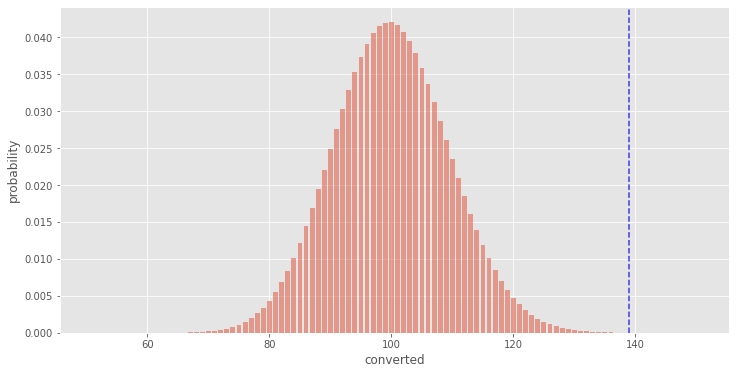

In [6]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(A_converted-49, A_converted+50, 100)
y = scs.binom(A_total, A_cr).pmf(x)
ax.bar(x, y, alpha=0.5)
ax.axvline(x=B_cr * A_total, c='blue', alpha=0.75, linestyle='--')
plt.xlabel('converted')
plt.ylabel('probability')

Розподіл для контрольної групи відображається червоним кольором, а результат від контрольної групи позначається синьою пунктирною лінією. Ми бачимо, що ймовірність отримати результат від тестової групи була дуже низькою. Однак ймовірність не передає рівень впевненості в результатах. Він не враховує обсяг вибірки нашої тестової групи. Інтуїтивно ми почувались би впевненіше у своїх результатах, коли розмір вибірки збільшувався. Давайте продовжимо і побудуємо результати тестової групи як біноміальний розподіл та порівняємо розподіли між собою.

#### Біноміальний розподіл

Text(0, 0.5, 'probability')

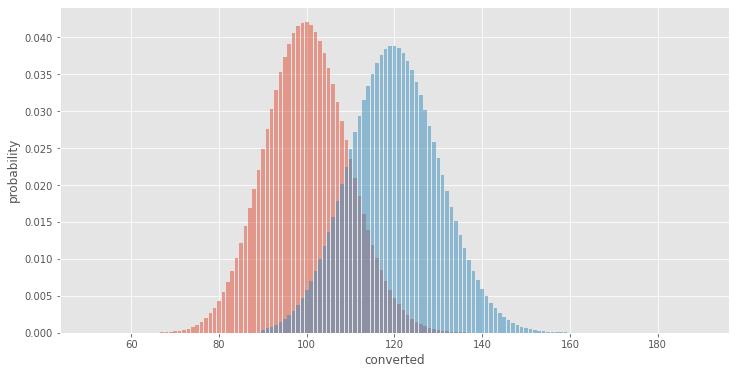

In [7]:
fig, ax = plt.subplots(figsize=(12,6))
xA = np.linspace(A_converted-49, A_converted+50, 100)
yA = scs.binom(A_total, p_A).pmf(xA)
ax.bar(xA, yA, alpha=0.5)
xB = np.linspace(B_converted-49, B_converted+50, 100)
yB = scs.binom(B_total, p_B).pmf(xB)
ax.bar(xB, yB, alpha=0.5)
plt.xlabel('converted')
plt.ylabel('probability')

Ми бачимо, що в тестовій групі конверсія більше ніж контрольній. 
Ми також можемо бачити, що пік результатів тестової групи нижчий, ніж у контрольної групи. 

Давайте розглянемо на коефіцієнт конверсії. 
Стандартизуємо дані та порівняємо ймовірність успіху, p, для кожної групи.

#### Розподіл Бернуллі та центральна гранична теорема


Спочатку розглянемо [розподіл Бернуллі](https://uk.wikipedia.org/wiki/%D0%A0%D0%BE%D0%B7%D0%BF%D0%BE%D0%B4%D1%96%D0%BB_%D0%91%D0%B5%D1%80%D0%BD%D1%83%D0%BB%D0%BB%D1%96) для контрольної групи
$ X \sim Bernoulli(p)$, де р є ймовірність конверсії контрольної групи.

Відповідно до властивостей розподілу Бернуллі середнє та дисперсія такі:
$$E(x) = p$$
$$Var(x) = p(1 - p)$$

Відповідно до центральної граничної теореми, обчислюючи багато середніх вибірок, ми можемо наблизити справжнє середнє значення сукупності, 𝜇, з якого були взяті дані для контрольної групи. Розподіл середніх показників p, як правило, розподіляється навколо справжнього середнього із стандартним відхиленням, рівним стандартній похибці середнього. Рівняння для цього подано як:
$$\sigma_{\bar x} = \frac{s}{\sqrt n} = \frac{\sqrt {p(1-p)}}{\sqrt n}$$

Тому ми можемо представити обидві групи як нормальний розподіл із такими властивостями:
$$ \hat p \sim Normal(\mu = p, \frac{\sqrt {p(1-p)}}{\sqrt n})$$

Отже, ми матимемо два нормальних розподіли для p_A та p_B.

Створимо графік нормальнго розподілу за часткою успіху, де контрольна (червона) та тестова (синя) групи. 

Text(0, 0.5, 'PDF')

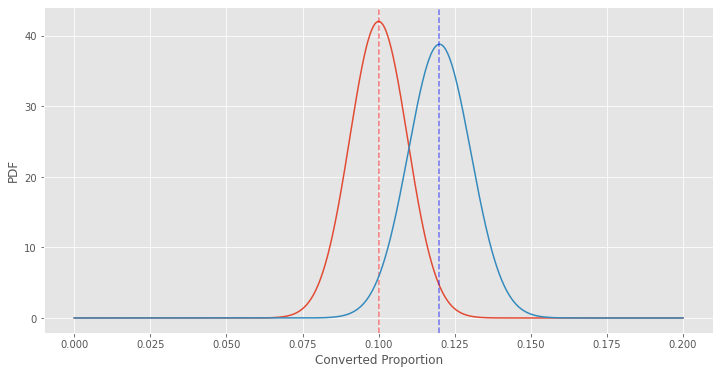

In [8]:
import matplotlib.pyplot as plt
import scipy.stats as scs

# standard error of the mean for both groups
SE_A = np.sqrt(p_A * (1-p_A)) / np.sqrt(A_total)
SE_B = np.sqrt(p_B * (1-p_B)) / np.sqrt(B_total)
# plot the null and alternative hypothesis
fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(0, .2, 1000)
yA = scs.norm(p_A, SE_A).pdf(x)
ax.plot(x, yA)
ax.axvline(x=p_A, c='red', alpha=0.5, linestyle='--')
yB = scs.norm(p_B, SE_B).pdf(x)
ax.plot(x, yB)
ax.axvline(x=p_B, c='blue', alpha=0.5, linestyle='--')
plt.xlabel('Converted Proportion')
plt.ylabel('PDF')

Штрихові лінії представляють середній коефіцієнт конверсії для кожної групи. Відстань між червоною пунктирною лінією та синьою пунктирною лінією дорівнює середній різниці між контрольною та тестовою групою. 

$\hat d$ - це розподіл різниці між випадковими величинами з двох груп.
$$\hat d = \hat p_A - \hat p_B$$

#### Дисперсія сум


Нехай, що нульова гіпотеза стверджує, що різниця ймовірностей між двома групами дорівнює нулю. 

Отже, середнє значення для цього нормального розподілу буде дорівнювати нулю. Іншою властивістю, яка нам знадобиться для нормального розподілу, є стандартне відхилення або дисперсія. (Примітка: Дисперсія - це квадратичне стандартне відхилення.) Дисперсія різниці буде залежати від дисперсії ймовірності для обох груп.

Основною властивістю дисперсії є те, що [дисперсія суми](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Lane)/04%3A_Describing_Bivariate_Data/4.07%3A_Variance_Sum_Law_II_-_Correlated_Variables#:~:text=which%20is%20read%3A%20%22The%20variance,plus%20the%20variance%20of%20Y.%22&text=where%20%CF%81%20is%20the%20correlation%20between%20X%20and%20Y%20in%20the%20population.) двох випадкових незалежних змінних є сумою дисперсій.
$$Var(X \pm Y) = Var(X) + Var(Y)$$

Це означає, що нульова гіпотеза та альтернативна гіпотеза матимуть однакову дисперсію, яка буде сумою дисперсій для контрольної та тестової групи.
$$Var(\hat d) = Var (\hat p_A - \hat p_B) = \frac{\hat p_A(1 - \hat p_A)}{n_A} + \frac{\hat p_B(1 - \hat p_B)}{n_B}$$



Потім стандартне відхилення можна обчислити як:
$$\sigma = \sqrt {Var(\hat d)} = \sqrt {\frac{\hat p_A(1 - \hat p_A)}{n_A} + \frac{\hat p_B(1 - \hat p_B)}{n_B}}$$


Якщо ми покладемо це рівняння на терміни стандартного відхилення для розподілу Бернуллі, s:
$$\sigma = \sqrt {Var(\hat d)} = \sqrt {\frac{\hat s^2_A}{n_A} + \frac{\hat s^2_B}{n_B}}$$


і ми отримуємо наближення Саттервейта для об’єднаної стандартної помилки. Якщо ми обчислимо об'єднану ймовірність і використаємо об'єднану ймовірність для обчислення стандартного відхилення для обох груп, отримаємо:
$$\sigma = \sqrt {Var(\hat d)} = \sqrt {\frac{s^2_p}{n_A} + \frac{s^2_p}{n_B}}= \sqrt {s^2_p (\frac{1}{n_A} + \frac{1}{n_B})}= \sqrt {\hat p_p(1 - \hat p_p) (\frac{1}{n_A} + \frac{1}{n_B})}$$

де $\hat p_p = \frac{p_A N_B + p_B N_B}{N_A  + N_B}$

Завдяки цим виведенням ми тепер маємо достатньо інформації для побудови розподілів для нульової та альтернативної гіпотез.

#### Нульова та альтернативна гіпотеза

Почнемо з визначення нульової та альтернативної гіпотез.
 * Нульова гіпотеза: зміна дизайну, зробленого для тестової групи, не призведе до зміни коефіцієнта конверсії.
 * Альтернативна гіпотеза: зміна дизайну тестової групи призведе до збільшення (або зменшення) коефіцієнта конверсії.

Нульова гіпотеза  - буде нормальний розподіл із середнім значенням, рівним нулю, і стандартним відхиленням, рівним об'єднаній стандартній помилці.
$$H_0 : d = 0$$
$$\hat d_0 \sim Normal(0,SE_{об'єднана})$$

Альтернативна гіпотеза має таке ж стандартне відхилення, як і нульова гіпотеза, але середнє значення буде дорівнювати  різниці коефіцієнтів конверсії, $\hat d$. Це має сенс, оскільки ми можемо розрахувати різницю в коефіцієнтах конверсії безпосередньо з даних, але нормальний розподіл відображає можливі значення, які міг би дати нам наш експеримент.

$$H_A : d = P_B - P_A$$
$$\hat d_A \sim Normal(d,SE_{об'єднана})$$


Тепер, коли ми розуміємо виведення об’єднаної стандартної помилки, ми можемо просто безпосередньо побудувати нульові та альтернативні гіпотези для майбутніх експериментів. 

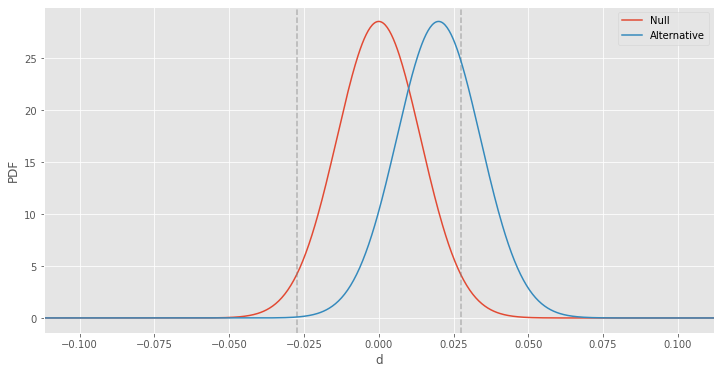

0

In [9]:
# define the parameters for abplot()
# use the actual values from the experiment for bcr and d_hat
# p_A is the conversion rate of the control group
# p_B is the conversion rate of the test group
n = N_A + N_B
bcr = p_A  
d_hat = p_B - p_A
abplot(N_A, N_B, bcr, d_hat)

Візуально графік нульової та альтернативної гіпотези виглядає дуже схожим на інші графіки вище. 
На щастя, обидві криві однакові за формою, тому ми можемо просто порівняти відстань між середніми двох розподілів. 

Ми бачимо, що крива альтернативної гіпотези свідчить про те, що тестова група має вищий коефіцієнт конверсії, ніж контрольна група. Цей графік також може бути використаний для безпосереднього визначення статистичної потужності.

#Обчислення статистичної потужності.



Легше визначити статистичну потужність та рівень значущості, спочатку продемонструвавши, як вони представлені в графіку нульової та альтернативної гіпотези. Ми можемо повернути візуалізацію статистичної потужності, додавши параметр show_power = True.

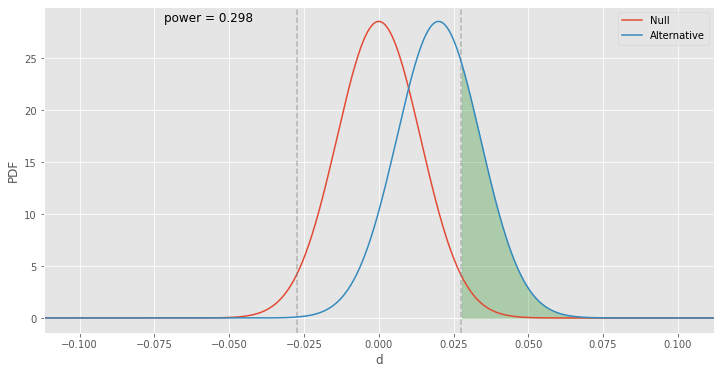

In [10]:
power = abplot(N_A, N_B, bcr, d_hat, sig_level=0.05, show_power=True)

Зелена затінена область представляє статистичну потужність, а розраховане значення потужності також відображається на графіку. Сірі пунктирні лінії на графіку вище представляють довірчий інтервал (95% для графіку вище) для нульової гіпотези. Статистична потужність обчислюється шляхом знаходження площі за альтернативним розподілом гіпотези та поза довірчим інтервалом нульової гіпотези.

Після запуску нашого експерименту ми отримуємо результуючий коефіцієнт конверсії для обох груп.

Площа під кривою альтернативної гіпотези дорівнює 1. Якщо альтернативний дизайн справді кращій, потужність - це ймовірність того, що ми приймаємо альтернативну гіпотезу та відкидаємо нульову гіпотезу, і дорівнює площі, затіненій зеленим (true positive). 

Протилежна область під альтернативною кривою - це ймовірність того, що ми приймаємо нульову гіпотезу та відкидаємо альтернативну гіпотезу (помилково негативний). Це називається бета-тестуванням при тестуванні A / B або тестуванні гіпотез і показано нижче.

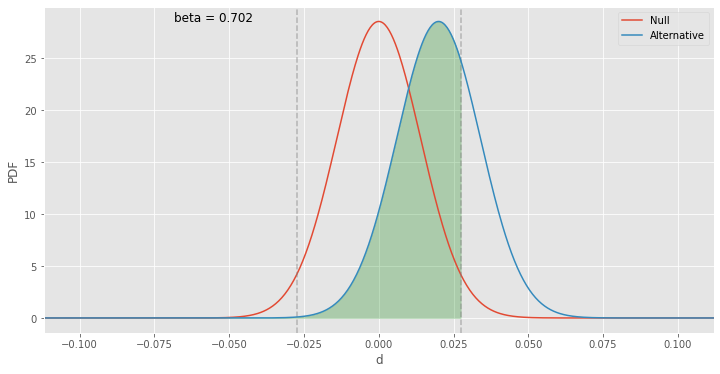

0.29782611840404305

In [11]:
abplot(N_A, N_B, bcr, d_hat, show_beta=True)

Сіра пунктирна лінія, що ділить область під альтернативною кривою на два, також безпосередньо відрізає область, пов'язану з рівнем значимості, часто позначається грецькою літерою альфа.

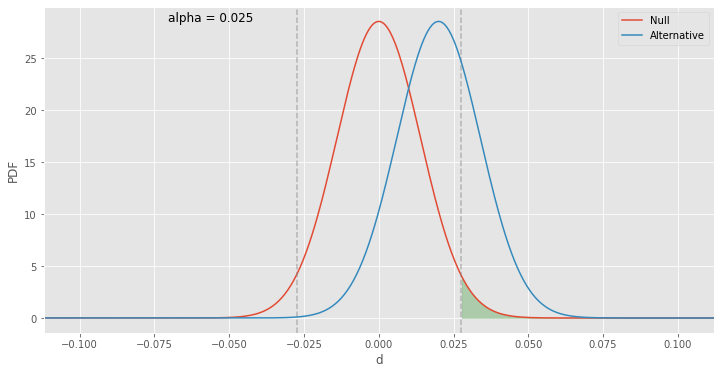

0.29782611840404305

In [12]:
abplot(N_A, N_B, bcr, d_hat, show_alpha=True)

Якщо нульова гіпотеза відповідає дійсності, і насправді не існує різниці між контрольною та тестовою групами, то рівень значущості - це ймовірність того, що ми відхилимо нульову гіпотезу та приймемо альтернативну гіпотезу (false positive). False positive - це коли ми помилково робимо висновок, що новий дизайн кращий. Це значення низьке, оскільки ми хочемо обмежити цю ймовірність.
Часто проблема видається із бажаним рівнем впевненості замість рівня значущості. Типовий 95% рівень довіри для тесту A / B відповідає рівню значущості 0,05.


Significance Level (alpha) and Confidence Level
$$\alpha = 100\% - Confidense level $$

Можливо, було б корисно звернутися до матриці невідповідностей, коли ви оцінюєте результати тесту A / B та різну ймовірність результатів.
Експерименти, як правило, встановлюються з мінімальною бажаною потужністю 80%. 
Якщо наш новий дизайн справді кращий, ми хочемо, щоб наш експеримент показав, що існує принаймні 80% ймовірності, що це так. 
На жаль, наш поточний експеримент має меньшу потужність. 

In [13]:
print(power)

0.29782611840404305


Ми знаємо, що якщо ми збільшимо обсяг вибірки для кожної групи, ми зменшимо об’єднану дисперсію для нашої нульової та альтернативної гіпотези. Це зробить наш розподіл значно вужчим і може збільшити статистичну потужність. Давайте подивимося, як обсяг вибірки безпосередньо вплине на наші результати.

#Оцінка впливу розміру вибірки на A / B тести.

Якщо ми знову проведемо наш тест із вибіркою 2000 замість 1000 для кожної групи, ми отримаємо такі результати.

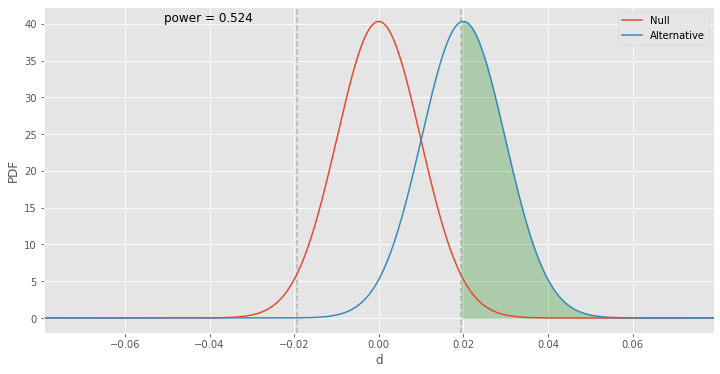

0.5244687880614298

In [14]:
abplot(2000, 2000, bcr, d_hat, show_power=True)

Наші криві для нульової та альтернативної гіпотези стали більш вузькими, і більша частина області під альтернативною кривою розташована праворуч від сірої пунктирної лінії. Результат для потужності перевищує 0,80 і відповідає нашому еталону щодо статистичної потужності. Зараз ми можемо сказати, що наші результати є статистично значущими.
Проблема, з якою ви можете зіткнутися, полягає у визначенні мінімального розміру вибірки, який вам знадобиться для експерименту. Це поширене запитання для співбесіди, і це корисно знати, оскільки воно безпосередньо пов’язане з тим, наскільки швидко ви можете завершити свої експерименти та надати статистично значущі результати своїй проектній команді. 

Ви можете використовувати калькулятори, доступні в Інтернеті, наприклад:
 * [Калькулятор Евана Міллера](http://www.evanmiller.org/ab-testing/sample-size.html)
 * [Калькулятор Оптімайзлі](https://www.optimizely.com/sample-size-calculator/?conversion=10&effect=20&significance=95) 

Для обчислення розміру скористаємось формулою з  [лекцій Стендфорського університету](https://web.stanford.edu/~kcobb/hrp259/lecture11.ppt)

$$n=\frac{2\bar p(1 - \bar p)(Z_{\beta} - Z_{\frac {\alpha}{2}})^2}{(p_{\beta} - p_{\alpha})^2}$$

де:
 * $Z_{\beta}$ : z-оцінка яка відповідає рівню статистичної потужності
 * $Z_{\frac {\alpha}{2}}$ : z-оцінка яка відповідає рівню статистичної значущості або рівню довіри (Confidance level)
 * $\bar p$ : об'єднана ймовірність або середне з $p_A$ та $p_B$
 * $p_A$ : відсоток успіху в контрольній групі
 * $p_B$ : відсоток успіху тестовій групі


Намалюємо z-розподіл

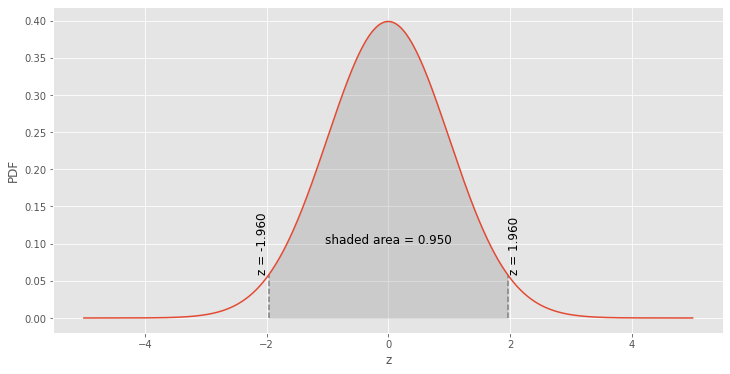

In [17]:
zplot(area=0.95, two_tailed=True)


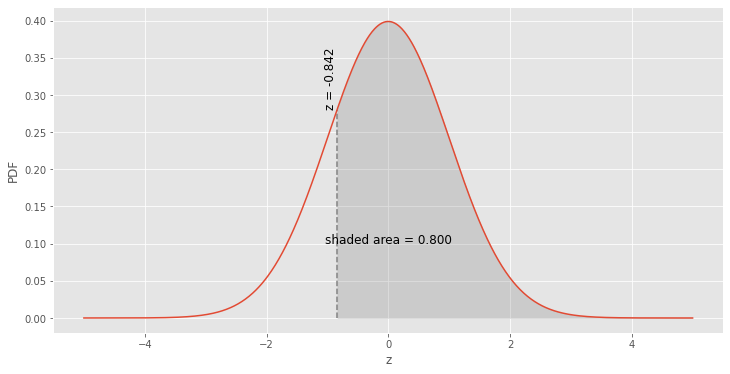

In [18]:
zplot(area=0.80, two_tailed=False, align_right=True)

Ось код Python, який виконує розрахунки для мінімального обсягу вибірки

In [22]:
import scipy.stats as scs

def min_sample_size(bcr, mde, power=0.8, sig_level=0.05):
    """Returns the minimum sample size to set up a split test

    Arguments:
        bcr (float): probability of success for control, sometimes
        referred to as baseline conversion rate

        mde (float): minimum change in measurement between control
        group and test group if alternative hypothesis is true, sometimes
        referred to as minimum detectable effect

        power (float): probability of rejecting the null hypothesis when the
        null hypothesis is false, typically 0.8

        sig_level (float): significance level often denoted as alpha,
        typically 0.05

    Returns:
        min_N: minimum sample size (float)

    References:
        Stanford lecture on sample sizes
        http://statweb.stanford.edu/~susan/courses/s141/hopower.pdf
    """
    # standard normal distribution to determine z-values
    standard_norm = scs.norm(0, 1)

    # find Z_beta from desired power
    Z_beta = standard_norm.ppf(power)

    # find Z_alpha
    Z_alpha = standard_norm.ppf(1-sig_level/2)

    # average of probabilities from both groups
    pooled_prob = (bcr + bcr+mde) / 2

    min_N = (2 * pooled_prob * (1 - pooled_prob) * (Z_beta + Z_alpha)**2
             / mde**2)

    return min_N

sample_size = min_sample_size(bcr, mde=d_hat, power=0.8, sig_level=0.05)
print(sample_size)

3842.026629963878


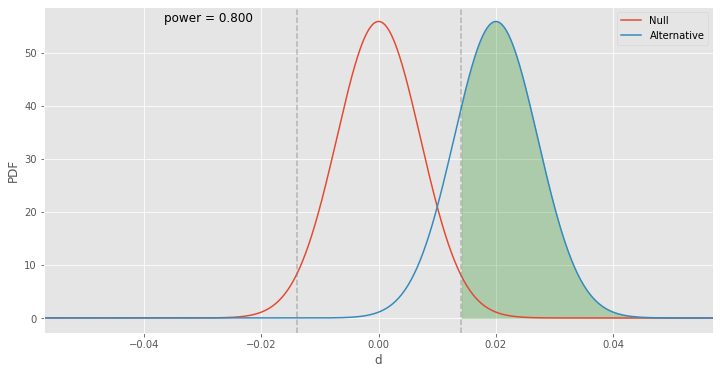

0.8000993340270237

In [23]:
abplot(3843, 3843, bcr, d_hat, show_power=True)

Розрахункова потужність для цього обсягу вибірки становила приблизно 0,80. Отже, якби наша зміна дизайну мала поліпшення конверсії приблизно на 2 відсотки, нам було б потрібно принаймні 3843 спостереження в кожній групі для статистичної потужності щонайменше 0,80.

Розрахувавши мінімальний розмір вибірки, ми можемо визначити, скільки часу знадобиться, для проведення експерименту та отримання результатів.

В цій статті була доопрацьована та виправлена стаття за [посиланням](https://towardsdatascience.com/the-math-behind-a-b-testing-with-example-code-part-1-of-2-7be752e1d06f)